# Изучение рынка заведений общественного питания Москвы

- Автор: Родина Дарья 
- Дата:

### Цели и задачи проекта

В цели и задачи проекта входит провести исследовательский анализ данных рынка общественного питания города Москвы, а также выявить наиболее подходящий район для открытия заведения. 

### Описание данных

Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания:
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки): 
0 — заведение не является сетевым;
1 — заведение является сетевым.
- seats — количество посадочных мест.


Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например: 
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»: 
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»: 
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

1. Загрузка данных и знакомство с ними 
2. Предобработка данных 
3. Исследовательский анализ данных 
4. Итоговый вывод и рекомендации

## 1. Загрузка данных и знакомство с ними


In [1]:
!pip install phik

In [2]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import phik

In [3]:
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

In [4]:
# выводим общую информацию данных в датафрейме с информацией о заведении 
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [5]:
# выводим первые 10 строк с информацией о заведении 
rest_info.head(10)

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN
6,96ebceb1a09e4e3191133b9fe0379a64,Огни города,"бар,паб","Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,0,45.0
7,0243288b78024af090b8e947842c969c,Mr. Уголёк,быстрое питание,"Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.7,0,45.0
8,36aeb0ffa69c48fdb0021549520deb10,Donna Maria,ресторан,"Москва, Дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",4.8,0,79.0
9,487167877eb04288bc90d4fa80646fc2,Готика,кафе,"Москва, Ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",4.3,0,65.0


In [6]:
# выводим общую информацию о данных в датафрейме о среднем чеке в заведениях общественного питания
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [7]:
# выводим первые 10 строк 
rest_price.head(10)

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN
5,96ebceb1a09e4e3191133b9fe0379a64,средние,Средний счёт:199 ₽,199.0,NaN
6,0243288b78024af090b8e947842c969c,средние,Средний счёт:200–300 ₽,250.0,NaN
7,36aeb0ffa69c48fdb0021549520deb10,средние,Средний счёт:от 500 ₽,500.0,NaN
8,487167877eb04288bc90d4fa80646fc2,средние,Средний счёт:1000–1200 ₽,1100.0,NaN
9,ac32978af97641bfacf996e7f5a50ee5,средние,Цена бокала пива:250–350 ₽,NaN,NaN


---

### Промежуточный вывод


В датафрейме с информацией о заведении содержатся данные в объёме 591 КБ. Названия столбцов полностью отражают суть наполненных ими данных, а также имеют одинаковые регистры и формат "имени" столбца. Всего в датафрейме 8406 строк. В некоторых столбцах имеются пропуски, а именно в столбцах hours(7870) и seats(4795). Все столбцы имеют правильный тип данных: float(2 столбца), int(1 столбец), object(6 столбцов).

В датафрейме с информацией о среднем чеке в заведениях общественного питания содержатся данные в объёме 158 КБ. названия столбцов полностью отражают суть наполненных ими данных, а также имеют одинаковый стиль и формат написания "имени" столбца. Всего в датафрейме 4058 строк. Во многих столбцах имеются пропуски, а именно: price(3315), avg_bill(3816), middle_avg_bill(3149) и middle_coffee_cup(535). Все столбцы имеют правильный тип данных: float(2 столбца) и object(3 столбца).

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [8]:
# соединяем данные в единай датафрейм 
df = rest_info.merge(rest_price, on = 'id', how = 'outer')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## 2. Предобработка данных


In [10]:
# оптимизируем целочисленный тип данных 
df['chain'] = pd.to_numeric(df['chain'], downcast = 'integer')

In [11]:
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

In [12]:
# фиксируем количество строк до предобработки данных 
initial_row_count = df.shape[0]
initial_row_count

8406

In [13]:
# проверяем количество пропусков
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [14]:
# считаем долю пропусков в каждом столбце 
df.isna().sum() / df.shape[0] * 100

id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
hours                 6.376398
rating                0.000000
chain                 0.000000
seats                42.957411
price                60.563883
avg_bill             54.603854
middle_avg_bill      62.538663
middle_coffee_cup    93.635498
dtype: float64

В датафрейме обнаружено множество пропусков. В столбце hours 536 пропусков, что сотавляет 6 процентов. Такие пропуски можно удалить, а можно отсавить как есть, чтобы не потерять данные. Поэтому с целью сохранения максимального количества данных -  оставим пропущенные значения данного столбца. Пропуски в этом столбце могут быть вызваны: техническими сбоями, временным закрытием заведения или полным закрытыием заведения. 

В столбце seats количество пропусков составляет 3611, что 42% от всех данных. Количество пропусков достаточно большое, чтобы их удалить. Пропуски в этом столбце могут быть вызваны: при обработке данных произошел технический сбой, заведение пректратило свою работу, заведение работает без посадочных мест. Такие пропуски нужно оставить без внимания, так как в случае замены пропуска на нереалистичное значение или какое-либо другое, существует риск сделать неправильный и некорректный исследовательский анализ.

В столбце price 5091 пропуска, что составляет 60% от всех данных. Такие пропуски можно заполнить пустыми строками. 

В столбце avg_bill количество пропусков составляет 4590, что 54% от всех данных. Для того, чтобы не потерять данные, пропуски можно заменить на нереалистичное значение в виде пустой строки. 

Столбец middle_avg_bill имеет 5257 пропусков, что составляет 62% от всех данных. Такие пропуски нужно оставить без изменений, так как заменив такое большое количество значений на усредненное, можно получить неверный анализ. 

Столбец middle_coffee_cup имеет 7871 пропущенных значений, что 93% от всех данных. Такие пропуски также лучше оставить без изменений. 

In [15]:
# заполняем пропуски столбца price пустыми строками 
df['price'] = df['price'].fillna('')

In [16]:
# заполняем пропуски столбца avg_bill пустыми строками 
df['avg_bill'] = df['avg_bill'].fillna('')

In [17]:
# проверяем явные дубликаты в датафрейме 
df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. Проверим неявные дубликаты по id заведения. 

In [18]:
# проверяем неявные дубликаты в датафрейме
df.duplicated(subset='id').sum()

0

Неявные дубликаты по столбцу id отсутствуют 

In [19]:
# проверим уникальные значения в категориальных данных 
for column in ['category', 'price', 'name', 'address', 'district']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце price:
['' 'высокие' 'выше среднего' 'низкие' 'средние']

Уникальные значения в столбце name:
['#КешбэкКафе' '+39 Pizzeria Mozzarella bar' '1 Этаж' ... 'Ясно' 'Яуза'
 'ночной Баку']

Уникальные значения в столбце address:
['Москва, 1-й Автозаводский проезд, 5'
 'Москва, 1-й Балтийский переулок, 3/25'
 'Москва, 1-й Варшавский проезд, 1Ас9' ...
 'Москва, шоссе Энтузиастов, 86А, корп. 3' 'Москва, шоссе Энтузиастов, с2'
 'Москва, № 7']

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']



In [20]:
df['name'] = df['name'].str.lower()
df['address'] = df['address'].str.lower()

In [21]:
df['name'].sort_values().unique()

array(['#кешбэккафе', '+39 pizzeria mozzarella bar', '1 этаж', ...,
       'ё-ланч', 'ёж и устрица', 'ёрш'], dtype=object)

In [22]:
df['address'].sort_values().unique()

array(['москва, 1-й автозаводский проезд, 5',
       'москва, 1-й балтийский переулок, 3/25',
       'москва, 1-й варшавский проезд, 1ас9', ...,
       'москва, яузский бульвар, 11, стр. 1',
       'москва, яузский бульвар, 14/8', 'москва, № 7'], dtype=object)

Неявные дубликаты в датафрейме отсутствуют 

In [23]:
# создаем функцию для нового столбца с отбором значений 
def is_24_7(row):
    if row['hours'] == 'ежедневно, круглосуточно':
        return True
    else:
        return False
# присоединяем значения к новомоу столбцу 
df['is_24_7'] = df.apply(is_24_7, axis = 1)

In [24]:
# фиксируем количество строк после предобработки данных
final_row_count = df.shape[0]
final_row_count

8406

---

### Промежуточный вывод

In [25]:
# абсолютное значение удаленных строк 
cleaned_row_count_absolutely = initial_row_count - final_row_count
cleaned_row_count_absolutely

0

In [26]:
# относительное значение удаленных строк 
cleened_row_count = round((final_row_count / initial_row_count * 100), 2)
cleened_row_count

100.0

В результате предобработки данных были совершены следующие действия:
- соединены два датафрейма по общему столбцу
- оптимизированы типы данных для оптимизации памяти
- изучены пропущенные значения. Пропуски оказались во многих столбцах, с каждым из которых был проведена индивидуальная работа. В основном пропуски заменились на пропущенные значения или пустые строки, чтобы не повлиять на корректность проведения дальнейшего исследовательского анализа. 
- данные провели на явные и неявные дубликаты. 

## 3. Исследовательский анализ данных

---

### Задача 1


In [27]:
# проверяем распределение данных по значениям столбца category
df['category'].value_counts(normalize = True)

кафе               0.282893
ресторан           0.243041
кофейня            0.168094
бар,паб            0.091006
пиццерия           0.075303
быстрое питание    0.071734
столовая           0.037473
булочная           0.030454
Name: category, dtype: float64

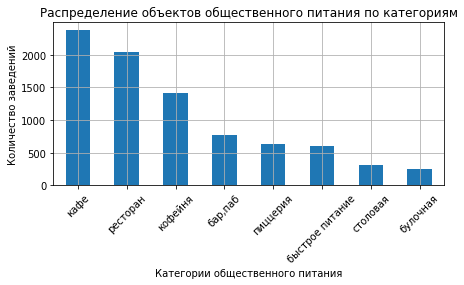

In [28]:
# строим столбчатую диаграмму 
df['category'].value_counts().plot( kind = 'bar',
          title = 'Распределение объектов общественного питания по категориям',
          legend = False,
          rot = 45,
          figsize = (7, 3),
          xlabel = 'Категории общественного питания',
          ylabel = 'Количество заведений')
plt.grid()
plt.show()

Из категорий общественного питания существенно преобладают кафе, составляя 2378 заведений в Москве. Рестораны и кофейни имеют 2043 и 1413 заведений соответственно. Они занимают вторую и третью строчки после кафе.

Соответственно, изходя из данного графика, можем отметить, что наибольшим спросом пользуются кафе, а наименьшим булочные. 

---

### Задача 2

Какие административные районы Москвы присутствуют в данных?

In [29]:
# проверяем распределение количества заведений по административным районам Москвы 
df.groupby('district')['id'].count()

district
Восточный административный округ            798
Западный административный округ             851
Северный административный округ             900
Северо-Восточный административный округ     891
Северо-Западный административный округ      409
Центральный административный округ         2242
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Южный административный округ                892
Name: id, dtype: int64

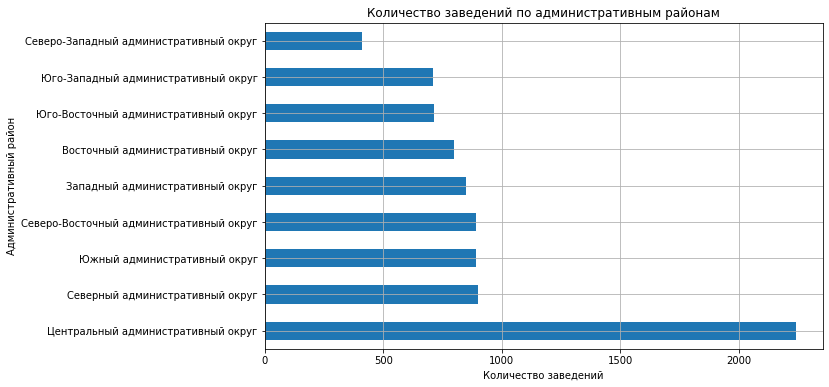

In [30]:
# строим линейчатую диграмму с распределением количества заведений по административным районам Москвы 
df.groupby('district')['id'].count().sort_values(ascending = False).plot(kind = 'barh',
                                         title = 'Количество заведений по административным районам',
                                         legend = False,
                                         figsize = (10, 6),
                                         xlabel= 'Административный район',
                                         ylabel = 'Количество заведений',
                                         rot = 0)
plt.xlabel('Количество заведений')
plt.grid()
plt.show()

На основе графика видно, что у Центрального административного округа количество заведений сильно преобладает по сравнению с остальными. Их количество составляет 2242 штук, в то время как в следующем по количеству заведений округе - Северный административный округ, имеет 900 заведений. Меньше всего заведений находятся в Северо-западном административном округе. 

In [31]:
# фильтруем данные по центральномиьу району 
df_agg = df.set_index('district')
centr_district = df_agg.loc['Центральный административный округ', ['id','category']]
# группируем отфильтрованные данные по категориям и считаем количество заведений в каждой категории
all_centre_group = centr_district.groupby('category')['id'].count()
all_centre_group.sort_values(ascending=False)

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: id, dtype: int64

In [32]:
# посчитаем относительное значение 
all_centre_group_abs = all_centre_group / all_centre_group.sum() * 100
all_centre_group_abs

category
бар,паб            16.235504
булочная            2.230152
быстрое питание     3.880464
кафе               20.695807
кофейня            19.090098
пиццерия            5.040143
ресторан           29.884032
столовая            2.943800
Name: id, dtype: float64

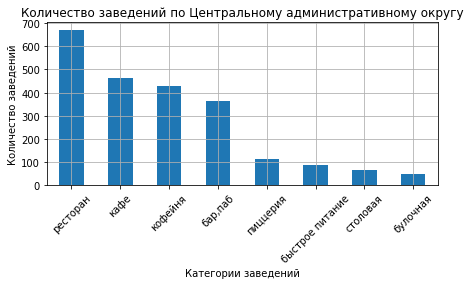

In [33]:
all_centre_group.sort_values(ascending=False).plot(kind = 'bar',
                      title = 'Количество заведений по Центральному административному округу',
                      legend = False,
                      figsize = (7, 3),
                      xlabel= 'Категории заведений',
                      ylabel = 'Количество заведений',
                      rot = 45)
plt.grid()
plt.show()

В Центральном административном оркуге больше всего ресторанов, составляющие 29,9% от общего числа заведений в данном районе. Далее находятся кафе и кофейни, которые составляют 464 и 428 заведения соответственно. Бары и пабы по количеству немного меньше, чем две предыдущие категории, и их число 364. Меньше всего в Центральном районе города булочных, которые составляют 50 штук. 

Таким образом, можно сделать вывод, что самая актуальная категория заведений в Центральном районе города Москвы является ресторан.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

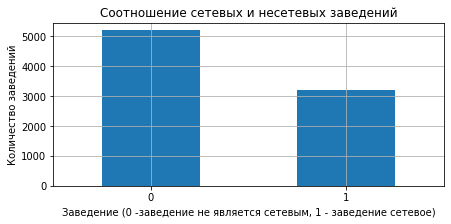

In [34]:
# строим график столбчатой диаграммы соотношения количества сетевых и несетевых заведений 
grouped = df.groupby('chain')['id'].count()
grouped.plot(kind='bar',
               title=f'Соотношение сетевых и несетевых заведений',
               legend= False,
               ylabel='Количество заведений',
               xlabel='Заведение (0 -заведение не является сетевым, 1 - заведение сетевое)',
               rot=0,
               figsize=(7, 3))
plt.grid()
plt.show()

По данному графику видно, что несетевых заведений более чем на 1000 штук больше, чем сетевых. 

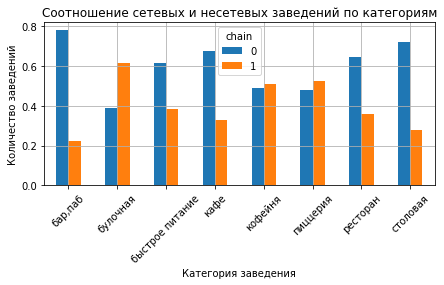

In [35]:
# строим график столбчатой диаграммы соотношения количества сетевых и несетевых заведений по категориям
grouped = df.groupby('category')['chain'].value_counts(normalize = True).unstack(fill_value=0)
grouped.plot(kind='bar',
               title=f'Соотношение сетевых и несетевых заведений по категориям',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Категория заведения',
               rot=45,
               figsize=(7, 3))
plt.grid()
plt.show()

На основе графика можно увидеть, что среди несетевых заведений преобладают бары и пабы и составляют почти 0,8 всех заведений. В то время как сетевых баров и пабов в несколько раз меньше. Самым большим по количеству открытых сетевых заведений являются булочные, которые составляют чуть более 0,6 всех заведений. Таким образом мы видим, что количество несетевых заведений сильно отличается в положительную сторону от сетевых. 

---

### Задача 4

Исследуйте количество посадочных мест в заведениях.


In [36]:
# изучаем статистическик показатели столбца seats
df['seats'].describe()

count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Большая разница между медианой и средним значением говорит о выбросах в данных. Минимальное значение равняется 0. Можно преположить, что такое происходит из-за того, что во многих булочных и кофейнях не существует посадочных мест.  Максимальное значение в виде 1288 посадочных мест в заведении выглядит подозрительно, но такое значение может быть. 

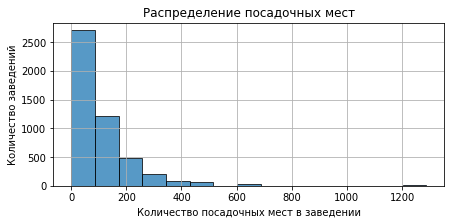

In [37]:
# строим гистограмму
plt.figure(figsize=(7, 3))
df['seats'].plot(
                kind='hist', 
                bins=15,
                alpha=0.75,
                edgecolor='black',
                rot=0)
plt.title('Распределение посадочных мест')
plt.xlabel('Количество посадочных мест в заведении')
plt.ylabel('Количество заведений')
plt.grid()
plt.show()

Распредление значения ассиметрично - скошено вправо. Минимальное количество посадочных мест равно нулю, а максимальное - 1288, что можно считать корректным.
На графике можно увидеть, что больше всего в заведениях посадочные места нахоядтся в диапазоне от 0 до 100. 

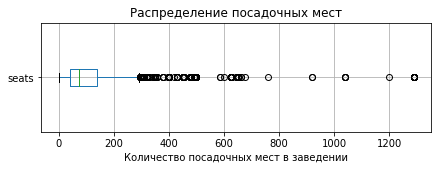

In [38]:
# Строим диаграмму размаxа для столбца seats
plt.figure(figsize=(7, 2))
df.boxplot(column = 'seats', vert = False)
plt.title('Распределение посадочных мест')
plt.xlabel('Количество посадочных мест в заведении')
plt.show()

По "ящику с усами" можно считать значения, которые выше примерно 300 - выбросами. Исходя из диаграммы размаха, максимальные значения можно считать за выбросы, однако такое количество можно допустить для заведений, которые специализируются на банкетах или больших мероприятиях. Именно по данной причине можно оставить данные, так как исключив их, можем потерять категории заведений направленные на крупные торжества. 

In [39]:
# находим с помощью медианы наиболее типичное количество посадочных мест для каждой категории заведений
df_seats = df.groupby('category')['seats'].median()
df_seats

category
бар,паб            82.5
булочная           50.0
быстрое питание    65.0
кафе               60.0
кофейня            80.0
пиццерия           55.0
ресторан           86.0
столовая           75.5
Name: seats, dtype: float64

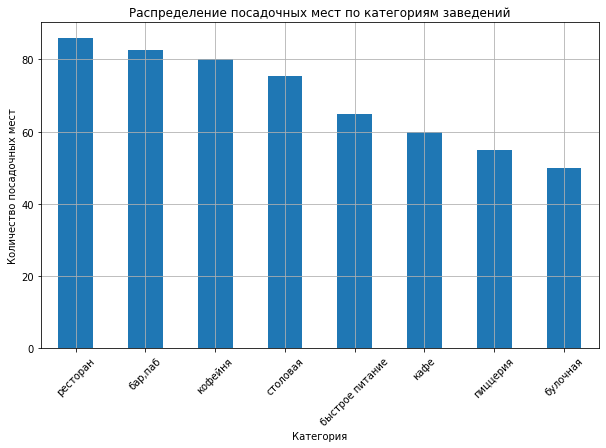

In [40]:
#строим график столбчатой диаграммы
df_seats.sort_values(ascending = False).plot(kind = 'bar',
             title = 'Распределение посадочных мест по категориям заведений',
             legend = False,
             xlabel = 'Категория',
             ylabel = 'Количество посадочных мест',
             rot = 45,
             figsize = (10, 6))
plt.grid()
plt.show()

Обозревая диаграмму, можно заметить, что рестораны и бары/пабы в среднем имеют больше всех осталных посадочных мест. Больше 80 посадочных мест имеют рестораны, бары/пабы и кофейни. Более 60 - кафе, заведения быстрого питания и столовые. И минимальное количество посадочных мест имеют пиццерии и булочные с примерно 55 местами.  

---

### Задача 5

Исследуйте рейтинг заведений. 

In [41]:
# изучаем статистическик показатели столбца rating
df['rating'].describe()

count    8406.000000
mean        4.229895
std         0.470348
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Маленькая разница между медианой и средним значением означает, что выбросов в данных нет. Минимальное значение равняется 1, а максимальное 5 - это означает, что данные корректные. 

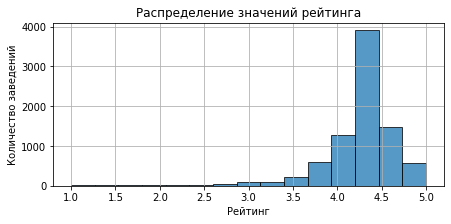

In [42]:
# строим гистограмму 
plt.figure(figsize=(7, 3))
df['rating'].plot(
                kind='hist', 
                bins=15,
                alpha=0.75,
                edgecolor='black',
                rot=0)
plt.title('Распределение значений рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Количество заведений')
plt.grid()
plt.show()

Распредление значения симметрично, но скошено влево, то есть имеет хвост. По построенной гистограмме хорошо видно, что большинство заведений имеют оценку в 4,3 и 4,4 балла. 

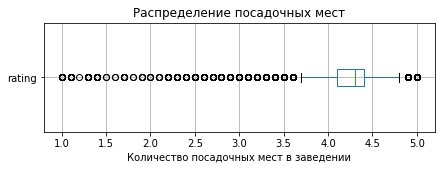

In [43]:
#строим диаграмму размаха для столбца rating
plt.figure(figsize=(7, 2))
df.boxplot(column = 'rating', vert = False)
plt.title('Распределение посадочных мест')
plt.xlabel('Количество посадочных мест в заведении')
plt.show()

По диаграмме размаха можно считать значения, которые ниже 3,75, а также рейтинг в 5,0 выбросами. Но такие рейтинги имеют место быть, так как оцениваются профессионалами. По причине того, что убрав выбросы, можно потерять большую часть данных, а также что эти данные совершенно корректны, их убирать не будем. 

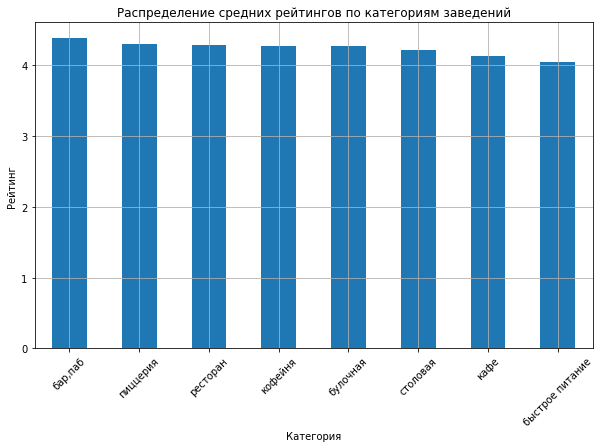

In [44]:
#визуализируем с помощью столбчатой диаграммы распределение средних рейтингов по категориям заведений 
df.groupby('category')['rating'].mean().sort_values(ascending = False).plot(kind = 'bar',
             title = 'Распределение средних рейтингов по категориям заведений',
             legend = False,
             xlabel = 'Категория',
             ylabel = 'Рейтинг',
             rot = 45,
             figsize = (10, 6))
plt.grid()
plt.show()


По столбчатой диаграмме "Распределение средних рейтингов по категориям заведений" видно, что значения усредненных рейтингов не сильно отличаются среди категорий. Все категории заведений имеют среднюю оценку больше 4 баллов. Минимальный усредненный рейтинг имеет быстрое питание, а максимальный – бар/паб. 

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений?

In [45]:
# вычисляем корреляционную матрицу 
correlation_matrix = df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'chain', 'seats']


,rating
price,0.281294
district,0.200691
category,0.190003
is_24_7,0.150173
chain,0.108092
seats,0.000000


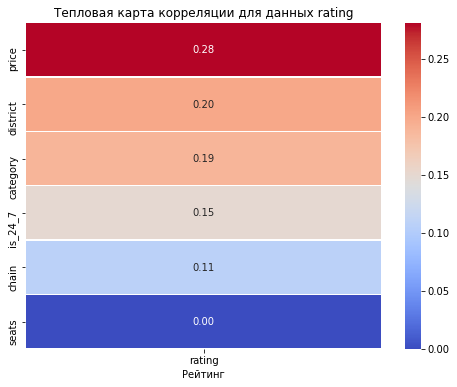

In [46]:
#Строим тепловую карту 
plt.figure(figsize = (8, 6))
corr_matrix = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data = corr_matrix,
           annot = True,
           fmt = '.2f',
           cmap = 'coolwarm',
           linewidths = 0.5,
           )
plt.title('Тепловая карта корреляции для данных rating')
plt.xlabel('Рейтинг')
plt.show()

Наибольшая корреляция рейтинга наблюдается с ценовой категорией заведения (0.28), с административным районом (0.2) и с категорией (0.19). Для остальных признаков коэффициент корреляции снижается с 0.15 до 0. Соответственно, можно сделать вывод что между ценовой категорией заведения и рейтингом существует несильная связь.  

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве.

In [47]:
# Группировка данных по имени заведения и агрегация по количеству заведений и категории
grouped_df = (df.loc[df['chain'] == 1]
              .groupby(['name'], as_index=False)
              .agg({'id' : 'count', 'category' : pd.Series.mode})
              .sort_values(by = 'id', ascending = False).head(15)
             )
grouped_df

,name,id,category
729,шоколадница,120,кофейня
335,домино'с пицца,76,пиццерия
331,додо пицца,74,пиццерия
146,one price coffee,71,кофейня
742,яндекс лавка,69,ресторан
58,cofix,65,кофейня
168,prime,50,ресторан
664,хинкальная,44,кафе
409,кофепорт,42,кофейня
418,кулинарная лавка братьев караваевых,39,кафе


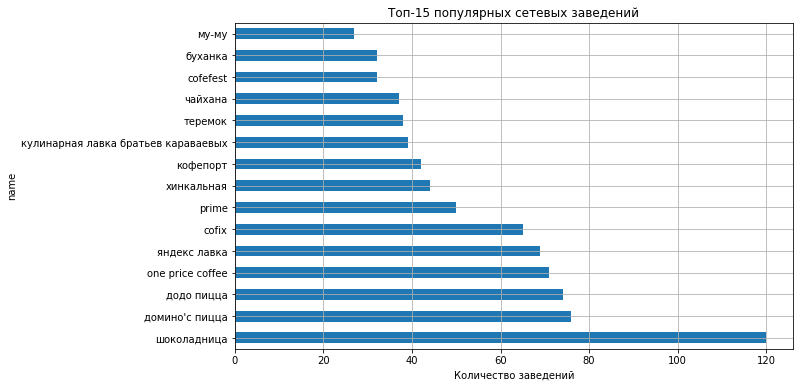

In [48]:
# строим линейную диаграмму 
grouped_df.plot(kind = 'barh',
               title = 'Tоп-15 популярных сетевых заведений',
               legend = False,
               x = 'name',
               y = 'id',
               rot = 0,
               figsize = (10, 6))
plt.xlabel('Количество заведений')
plt.grid()
plt.show()

In [49]:
# посчитаем средний рейтинг для каждого из Топ-15 заведений
grouped_df_2 = (df.loc[df['chain'] == 1]
              .groupby(['name'], as_index=False)
              .agg({'id' : 'count', 'category' : pd.Series.mode, 'rating' : 'median'})
              .sort_values(by = 'id', ascending = False).head(15)
             )
grouped_df_2

,name,id,category,rating
729,шоколадница,120,кофейня,4.20
335,домино'с пицца,76,пиццерия,4.20
331,додо пицца,74,пиццерия,4.30
146,one price coffee,71,кофейня,4.20
742,яндекс лавка,69,ресторан,4.00
58,cofix,65,кофейня,4.10
168,prime,50,ресторан,4.20
664,хинкальная,44,кафе,4.40
409,кофепорт,42,кофейня,4.20
418,кулинарная лавка братьев караваевых,39,кафе,4.40


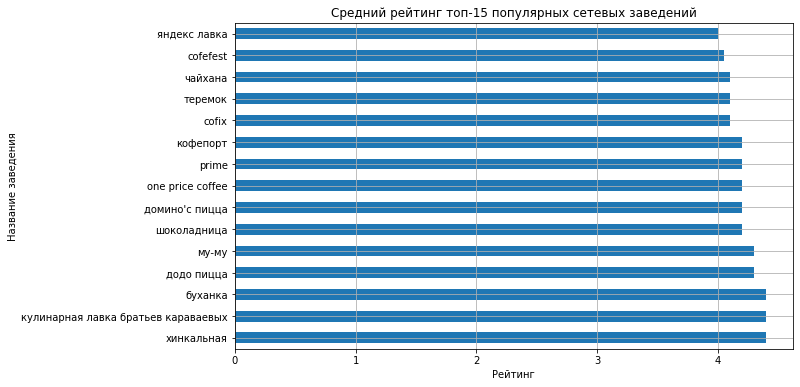

In [50]:
#строим линейную диаграмму 
grouped_df_2.sort_values(by = 'rating', ascending = False).plot(kind = 'barh',
               title = 'Средний рейтинг топ-15 популярных сетевых заведений',
               legend = False,
               x = 'name',
               y = 'rating',
               rot = 0,
               figsize = (10, 6))
plt.xlabel('Рейтинг')
plt.ylabel('Название заведения')
plt.grid()
plt.show()

Все сетевые заведения из категории "Топ-15" имеют рейтинг выше 4.0. Самый большой рейтинг в 4.4 у хинкальной, кулинарная лавка братьев караваевых и буханки. В то время как самый маленький рейтинг в отметку 4.0 у Яндекс лавки. В целом можно сказать, что у всех увиденных сетевых заведений положительный рейтинг, который означает хорошую репутацию.  

In [51]:
# считаем количество заведений в каждой категории 
category_group = grouped_df.groupby('category')['id'].count()
category_group

category
булочная    1
кафе        4
кофейня     5
пиццерия    2
ресторан    3
Name: id, dtype: int64

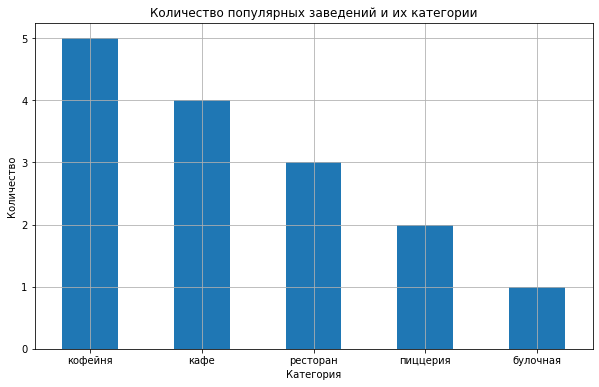

In [52]:
# строим стобчатую диаграмму 
category_group.sort_values( ascending = False).plot(kind = 'bar',
               title = 'Количество популярных заведений и их категории',
               legend = False,
               x = 'category',
               y = 'id',
               rot = 0,
               figsize = (10, 6))
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.grid()
plt.show()

На графике "Tоп-15 популярных сетевых заведений" в тройку лучших заведений с самым большим количеством заведений (120 штук) входят "Шоколадница",  "Домино'c Пицца" и "Додо Пицца". На 15-м месте - "Му-му". 

Также стоит отметить, что большиство заведений относятся к категории кофейня. А наименее популярная категория среди топ-15 заведений считается булочная - из них всего одно заведение.

---

### Задача 8

Изучите вариацию среднего чека заведения в зависимости от района Москвы.

In [53]:
# изучаем статистическик показатели столбца middle_avg_bill
df['middle_avg_bill'].describe()

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

Большая разница между медианой и 50-ым процентилем означает что в данном столбце есть выбросы и аномальные значения 

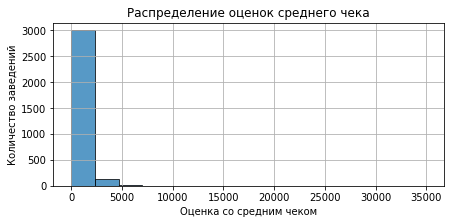

In [54]:
# строим гистограмму
plt.figure(figsize=(7, 3))
df['middle_avg_bill'].plot(
                kind='hist', 
                bins=15,
                alpha=0.75,
                edgecolor='black',
                rot=0)
plt.title('Распределение оценок среднего чека')
plt.xlabel('Оценка со средним чеком')
plt.ylabel('Количество заведений')
plt.grid()
plt.show()

Распределение значения ассиметрично - скошено вправо. Минимальная оценка равна нулю, что может быть, но такое явление достаточно редко, а максимальное - 35000, что можно считать корректным, если заведение специализируется на крупных торжествах или корпоративах. На графике можно увидеть, что больше всего в заведениях оценка среднего чека находится в диапазоне от 0 до 2500. 

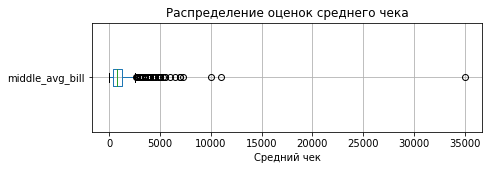

In [55]:
# строим диаграмму размаха для столбца middle_avg_bill
plt.figure(figsize = (7, 2))
df.boxplot(column = 'middle_avg_bill', vert = False)
plt.title('Распределение оценок среднего чека')
plt.xlabel('Средний чек')
plt.show()

По "ящику с усами" можно считать значения, которые выше примерно 2500 - выбросами. Исходя из диаграммы размаха, максимальные значения можно считать за выбросы, однако такое количество можно допустить для заведений, которые специализируются на банкетах или больших мероприятиях. Именно по данной причине можно оставить данные, так как исключив их, можем потерять категории заведений направленные на крупные торжества. Учитывая выбросы в столбце middle_avg_bill далее для задания будем использовать медиану, а не среднее значение. 

In [56]:
# изучаем вариации среднего чека в зависимости от района Москвы
df.groupby('district')['middle_avg_bill'].median()

district
Восточный административный округ            575.0
Западный административный округ            1000.0
Северный административный округ             650.0
Северо-Восточный административный округ     500.0
Северо-Западный административный округ      700.0
Центральный административный округ         1000.0
Юго-Восточный административный округ        450.0
Юго-Западный административный округ         600.0
Южный административный округ                500.0
Name: middle_avg_bill, dtype: float64

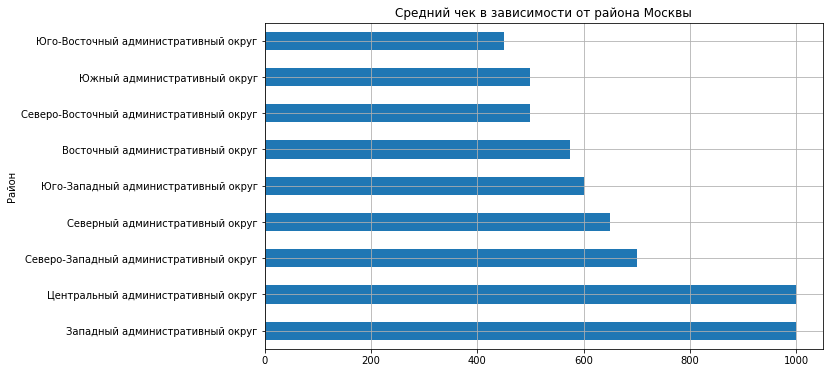

In [57]:
#строим столбчатую диаграмму 
df.groupby('district')['middle_avg_bill'].median().sort_values(ascending = False).plot(kind = 'barh',
               title = 'Средний чек в зависимости от района Москвы',
               legend = False,
               xlabel = 'Район',
               ylabel = 'Средний чек',
               rot = 0,
               figsize = (10, 6))
plt.grid()
plt.show()

На линейной дигарамме видно, что Центральный и Западный административные районы имеют самый большой средний чек, среди остальных районов, в размере 1000 рублей. Самый минимальный средний чек в Юго-Восточном административном округе. 
Поэтому мы можем наблюдать такую тенденцию, как уменьшение среднего чека и прайса в зависимости от дальности от центра. Можем преположить, что чем дальше находится район от центра города, тем меньше будут цены в заведениях. 

---

### Задача 9



Проверим может ли рейтинг заведения влиять на цену за чашку кофе. 

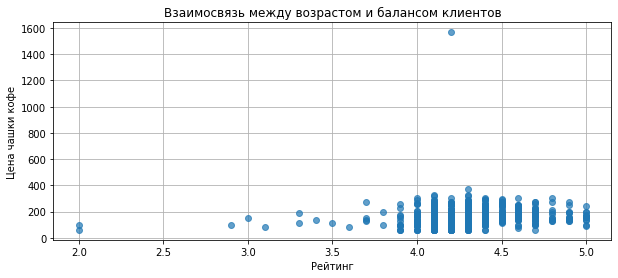

In [58]:

plt.figure(figsize=(10, 4))
plt.plot(df['rating'],
         df['middle_coffee_cup'],
         marker='o',
         linestyle='',
         alpha=0.7)
plt.title('Взаимосвязь между возрастом и балансом клиентов')
plt.xlabel('Рейтинг')
plt.ylabel('Цена чашки кофе')
plt.grid()
plt.show()

Изходя из данного графика, видно что повышение или поижение рейтинга никак не отражается на уровне цены за чашку кофе. Поэтому можно сказать, что связи между рейтингом и средней ценой за чашку кофе нет. 

Проверим может ли быть взаимосвязь между рейтингом и числом посадочных мест в заведении

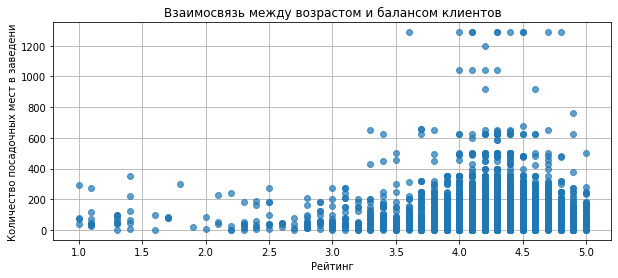

In [59]:
plt.figure(figsize=(10, 4))
plt.plot(df['rating'],
         df['seats'],
         marker='o',
         linestyle='',
         alpha=0.7)
plt.title('Взаимосвязь между возрастом и балансом клиентов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество посадочных мест в заведени')
plt.grid()
plt.show()

Здесь мы также видим, что рейтинг никак не влияет на количество мест в заведении, так как нет никакой динамики - ни положительной, ни отрицательной. 

На что же тогда влияет рейтинг?

In [60]:
# по методу Спирмена выводим весь датафрейм для изучения взаимосвязей с данными из столбца rating, а также другими данными 
corr_matrix = df.corr(method = 'spearman')
corr_matrix

,rating,chain,seats,middle_avg_bill,middle_coffee_cup,is_24_7
rating,1.000000,-0.058144,0.024814,0.363923,0.142333,-0.127513
chain,-0.058144,1.000000,0.051398,-0.120433,-0.081893,0.030154
seats,0.024814,0.051398,1.000000,0.173193,0.019633,-0.064898
middle_avg_bill,0.363923,-0.120433,0.173193,1.000000,NaN,-0.123565
middle_coffee_cup,0.142333,-0.081893,0.019633,NaN,1.000000,0.137446
is_24_7,-0.127513,0.030154,-0.064898,-0.123565,0.137446,1.000000


Мы видим, что умеренная или несильная взаимосвязь с рейтингом просходит с оценкой среднего чека. Посмотрим ее на графике 

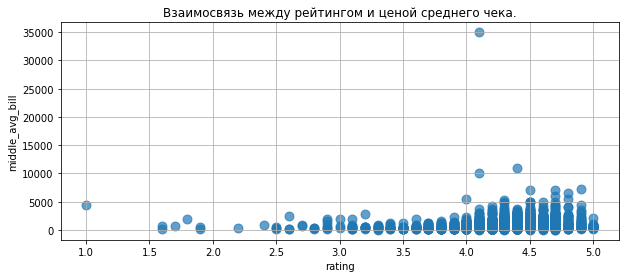

In [61]:
df.plot(kind = 'scatter',
       x = 'rating',
       y = 'middle_avg_bill',
       alpha = 0.7,
       title = 'Взаимосвязь между рейтингом и ценой среднего чека.',
       s =80,
       figsize = (10,4))
plt.grid()
plt.show()

На графике видна несильная положительная динамика, а именно при увеличении рейтинга немного увеличивается и цена среднего чека. 

In [62]:
# посмотрим наиболее частые часы работы заведений и их районное расположение 
df.groupby(['district'], as_index = False).agg({'hours' : pd.Series.mode})

,district,hours
0,Восточный административный округ,"ежедневно, круглосуточно"
1,Западный административный округ,"ежедневно, 10:00–22:00"
2,Северный административный округ,"ежедневно, 10:00–22:00"
3,Северо-Восточный административный округ,"ежедневно, 10:00–22:00"
4,Северо-Западный административный округ,"ежедневно, круглосуточно"
5,Центральный административный округ,"ежедневно, круглосуточно"
6,Юго-Восточный административный округ,"ежедневно, круглосуточно"
7,Юго-Западный административный округ,"[ежедневно, 10:00–22:00, ежедневно, круглосуто..."
8,Южный административный округ,"ежедневно, 10:00–22:00"


Чаще всего заведения работают ежедневно с 10:00 -22:00, только в Центральном районе заведения работют меньше всего с 12:00-22:00, но также ежедневно. В Восточном, Северо-Западном и Юго-Восточном административных округах чаще всего заведения работают и ежедневно и круглосуточно. 

In [63]:
# часы работы заведений и их категории 
df.groupby(['category'], as_index = False).agg({'hours' : pd.Series.mode})

,category,hours
0,"бар,паб","ежедневно, 12:00–00:00"
1,булочная,"ежедневно, 08:00–22:00"
2,быстрое питание,"ежедневно, круглосуточно"
3,кафе,"ежедневно, круглосуточно"
4,кофейня,"ежедневно, 10:00–22:00"
5,пиццерия,"ежедневно, 10:00–22:00"
6,ресторан,"ежедневно, 10:00–22:00"
7,столовая,пн-пт 09:00–17:00


In [64]:
group_coffee_cup = df.groupby(['district'], as_index = False).agg({'middle_coffee_cup' : 'median'}).sort_values(by = 'middle_coffee_cup', ascending = False)
group_coffee_cup

,district,middle_coffee_cup
7,Юго-Западный административный округ,197.0
5,Центральный административный округ,190.0
1,Западный административный округ,187.0
3,Северо-Восточный административный округ,162.5
2,Северный административный округ,159.0
4,Северо-Западный административный округ,150.0
8,Южный административный округ,149.5
6,Юго-Восточный административный округ,145.0
0,Восточный административный округ,135.0


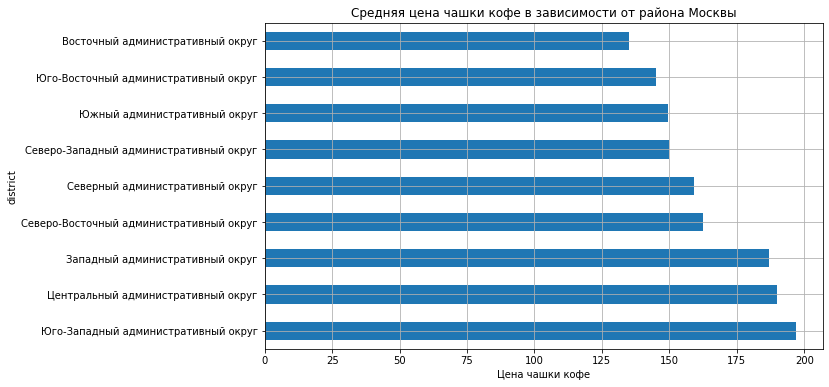

In [65]:
group_coffee_cup.plot(kind = 'barh',
               title = 'Средняя цена чашки кофе в зависимости от района Москвы',
               legend = False,
               x = 'district',
               y = 'middle_coffee_cup',
               rot = 0,
               figsize = (10, 6))
plt.xlabel('Цена чашки кофе')
plt.grid()
plt.show()

По графику видно, что самые дорогие чашки кофе находятся в Западном, Центральном и Юго-Западном административных округах

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

Исследовательский анализ данных показал, что:
- среди всего общественного питания преобладают кафе, составляя более 2000 заведений в Москве,
- больше всего заведений находятся в Центральном административном округе Москвы,
- в Центральном административном окурге преобладают типы: рестораны, кафе и кофейни,
- из всех заведений больше всего несетевых, из них больше всего баров и пабов, а из сетевых больше всего булочных,
- все категории заведений имеют среднюю оценку больше четырех баллов,
- самую сильное влияние рейтинг оказывает на оценку среднего чека, при этом связь достаточно слабая 
- среди топ-15 популярных сетевых заведений, больше всего кофейн, а меньше всего булочных,
- Центральный и Западные административные округа имеют самые большие средние чеки, из чего может следовать, что, чем дальше находится район от центра города, тем меньше будут цены в заведениях

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

###  Общий обзор общественного питания Москвы

Исследовательский анализ позволил сформировать обущю хаарктеристику об общественном питании Москвы: 

- Из 8406 заведений больше всего кофейн. Эта категория является самой популярной среди многих округов Москвы. Чем ближе к центру города, тем больше кофейн. Также преобладают несетевые заведения


- Самая большая конкуренция находится в центре города, так как именно там собрано самое большое количество заведений практически всех категорий


- Цена среднего чека также варьируется в зависимости от местоположения заведения. 

### Факторы, влияющие на выбор места для заведения 

Из данных мы вывели, что местоположение заведения влияет на успешность бизнеса.

- Самая большая конкуренция в Центральном районе Москвы, так как там самое большое количество заведений в размере 2242 штук. 

- Самая маленькая конкуренция в Северо-Западном и Юго-Западном административных округах в них 409 и 709 штук заведений соответственно. В остальных округах средняя конкуренция, и заведения не превышают 1000 штук на округ.  
- Самые большие средние чеки в Центральном и Западном районах, а самые маленькие в Юго-Восточном, Южном и Северо-Восточном районах города. 

- Самые дорогие чашки кофе (усредненно) в Юго-Западном, Центральном и Западном районах, самые маленькие в Восточном, Юго-Восточном и Южном районах. 

### Рекомендации

В случае, если вы хотите открыть какое-либо заведений с минимальной конкуренцией, то лучше это делать в Западном административном округе, так как именно там меньше всего заведений. Если есть необходимость или желание открыть заведение именно в центре города, то конкуренция меньше всего среди булочных. Открыв заведение в центре, можно расчитывать на большую проходимость, но так как присутсвует очень большая конкуренция - ситуация может быть неоднозначная или невыиграшная. 

Начать свое развитие в сфере общественного питания можно с другого округа (не с Центрального), чтобы: постепенно и мягко войти в область питания, исправить все ошибки (а они точно будут), удостовериться в правильности выбранного направления и категории заведения, а далее открываться в центре города. 
Чтобы зарекомендовать себя, стоит уделить особое внимание рейтингу, по которому ориентируются посетители, также он поможет увеличить выручку. Ведь для многих посетителей высокий рейтиг - знак качества. 

Исходя из вышенаписанных данных, можно пологать, что самым оптимальным вариантом для места открытия заведения будет Западный административный округ, так как именно там не самая высокая конкуренция (значит можно хорошо и быстро разваиваться), самые высокие средние чеки и цены на кофе (усредненно)